<a href="https://colab.research.google.com/github/realvoice98/bigdata-use-of-python/blob/main/%EB%B9%84%ED%8A%B8_220518_%EB%94%A5%EB%9F%AC%EB%8B%9DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#모델 상태 저장

In [ ]:
from tensorflow import keras
(train_input,train_target), (test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
test_scaled = test_input/255.0

In [ ]:

flat_layer = keras.layers.Flatten(input_shape=(28,28))
dense1= keras.layers.Dense(100,activation='sigmoid')
dense2 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential()
model.add(flat_layer)
model.add(dense1)
model.add(keras.layers.Dropout(0.5))
model.add(dense2)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()

In [ ]:
hist = model.fit(train_scaled, train_target,epochs=30,validation_split=0.2)

In [ ]:
model.save_weights('model_weights_test.h5')

In [ ]:
model.save('model-whole_test.h5')

In [ ]:
!pwd

/content


In [ ]:
import sys

In [ ]:
model2 = keras.models.load_model('/content/model-whole_test.h5')
model2.summary()

In [ ]:
print(model2.weights)

In [ ]:
model2.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8745


[0.3476244807243347, 0.8744999766349792]

#콜백

In [ ]:
def add(a,b):
  print(f'add:{a},{b}')
  return a+b


In [ ]:
def sub(a,b):
  print(f'sub:{a},{b}')
  return a-b

In [ ]:
def doall(ls1,ls2,fn):
  s= []
  for  i in range(len(ls1)):
    s.append(fn(ls1[i],ls2[i]))
    return s

In [ ]:
re = doall([1,2,3],[4,5,6],add)
print(re)

add:1,4
add:2,5
add:3,6
[5, 7, 9]


In [ ]:
re = doall([1,2,3],[4,5,6],sub)
print(re)

sub:1,4
sub:2,5
sub:3,6
[-3, -3, -3]


In [ ]:

flat_layer = keras.layers.Flatten(input_shape=(28,28))
dense1= keras.layers.Dense(100,activation='sigmoid')
dense2 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential()
model.add(flat_layer)
model.add(dense1)
model.add(keras.layers.Dropout(0.5))
model.add(dense2)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model_test.h5',save_best_only = True)
hist = model.fit(train_scaled, train_target,epochs=30,validation_split=0.2,callbacks=[checkpoint_cb])

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7442 - accuracy: 0.7415 - val_loss: 0.4829 - val_accuracy: 0.8233
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5158 - accuracy: 0.8169 - val_loss: 0.4236 - val_accuracy: 0.8437
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4719 - accuracy: 0.8315 - val_loss: 0.4053 - val_accuracy: 0.8517
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4454 - accuracy: 0.8404 - val_loss: 0.3945 - val_accuracy: 0.8592
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4248 - accuracy: 0.8475 - val_loss: 0.3778 - val_accuracy: 0.8597
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4123 - accuracy: 0.8528 - val_loss: 0.3702 - val_accuracy: 0.8648
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4048 - accuracy: 0.8542 - val_loss: 0.3561 - val_accuracy:

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model_test.h5',save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
hist = model.fit(train_scaled, train_target,epochs=1500,validation_split=0.2,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2031 - accuracy: 0.9210 - val_loss: 0.3780 - val_accuracy: 0.8910
Epoch 2/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2001 - accuracy: 0.9224 - val_loss: 0.3852 - val_accuracy: 0.8898
Epoch 3/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2031 - accuracy: 0.9218 - val_loss: 0.3883 - val_accuracy: 0.8888
Epoch 4/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2027 - accuracy: 0.9212 - val_loss: 0.3846 - val_accuracy: 0.8931
Epoch 5/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1987 - accuracy: 0.9233 - val_loss: 0.3889 - val_accuracy: 0.8917
Epoch 6/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2043 - accuracy: 0.9219 - val_loss: 0.3883 - val_accuracy: 0.8926


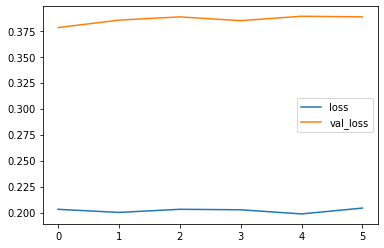

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

#CNN

In [ ]:
keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='same',strides=1)

In [ ]:
keras.layers.MaxPooling2D(2,strides=2,padding='valid')

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [ ]:
(train_input, train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()


In [ ]:
train_rinput= train_input.reshape(-1,28,28,1)
test_rinput = test_input.reshape(-1,28,28,1)
train_rinput.shape

(60000, 28, 28, 1)

In [ ]:
train_scaled = train_rinput/255.0
test_scaled = test_rinput/255.0

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(16,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)              

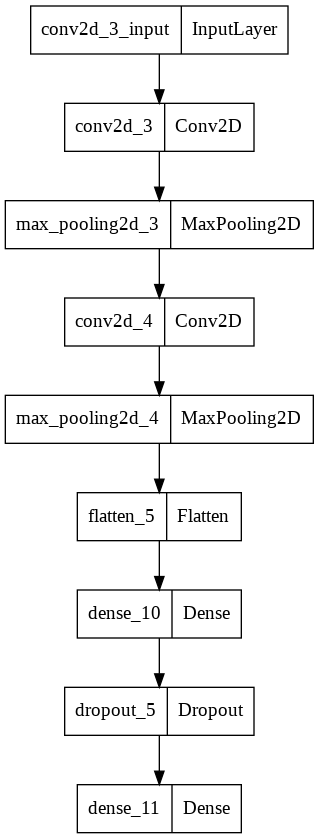

In [ ]:
keras.utils.plot_model(model)

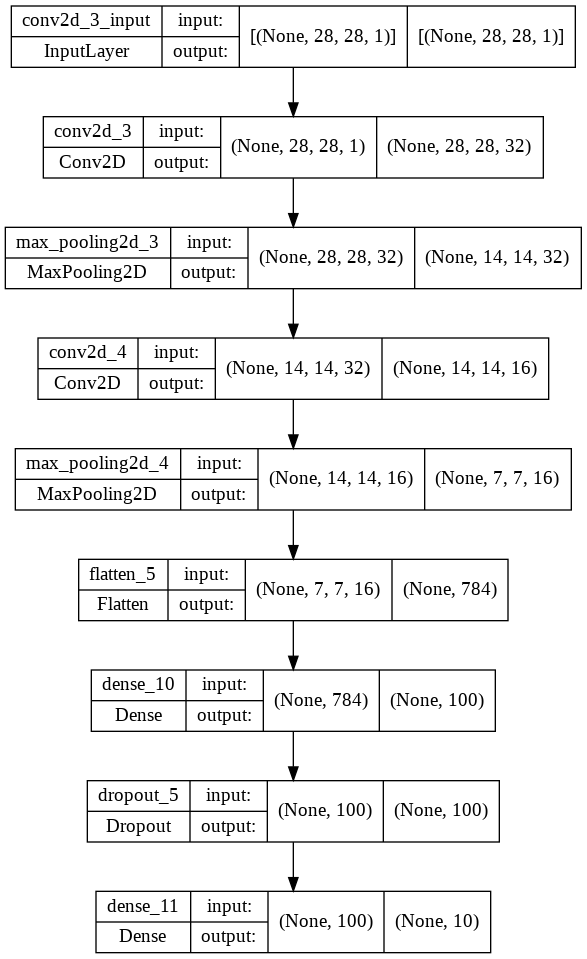

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from gc import callbacks
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
history = model.fit(train_scaled, train_target,validation_split=0.2,epochs=30000,callbacks=[early_stopping_cb])

Epoch 1/30000
1500/1500 [==============================] - 45s 30ms/step - loss: 0.6212 - accuracy: 0.7776 - val_loss: 0.3821 - val_accuracy: 0.8593
Epoch 2/30000
1500/1500 [==============================] - 47s 31ms/step - loss: 0.4132 - accuracy: 0.8537 - val_loss: 0.3181 - val_accuracy: 0.8829
Epoch 3/30000
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3622 - accuracy: 0.8706 - val_loss: 0.2951 - val_accuracy: 0.8893
Epoch 4/30000
1500/1500 [==============================] - 46s 31ms/step - loss: 0.3308 - accuracy: 0.8825 - val_loss: 0.2774 - val_accuracy: 0.8970
Epoch 5/30000
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3111 - accuracy: 0.8887 - val_loss: 0.2674 - val_accuracy: 0.9038
Epoch 6/30000
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2885 - accuracy: 0.8953 - val_loss: 0.2623 - val_accuracy: 0.9050
Epoch 7/30000
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2759 - accuracy: 0.9002

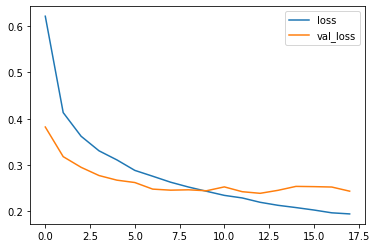

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
preds = model.predict(test_scaled[0:1])
print(preds)

[[1.8976767e-08 3.0207464e-13 1.4507516e-11 9.0285374e-10 4.9136719e-12
  1.4588536e-06 3.5500820e-09 7.2960116e-05 5.1901313e-11 9.9992549e-01]]


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [ ]:
model.save('best-cnn-mpdel.h5')

In [ ]:
model.layers

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std() )

-0.06183655 0.34412897


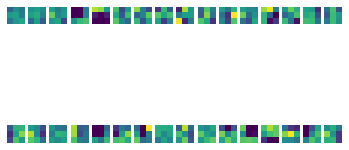

In [ ]:
fig, axs = plt.subplots(2,16)
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Conv2D(16,kernel_size=3,activation='relu',padding='same'))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(100,activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(10,activation='softmax'))
model2.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')



In [ ]:
conv2=model2.layers[0]
conv_weights2 = conv2.weights[0].numpy()

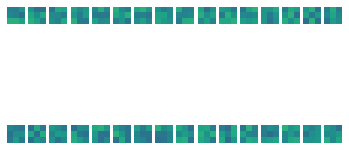

In [ ]:
fig, axs = plt.subplots(2,16)
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights2[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.coef_ = np.random.uniform(0,1)
print(lr.coef_)

0.0014440247300261388


In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")


In [ ]:
print(model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 32), dtype=tf.float32, name=None), name='conv2d_3/Relu:0', description="created by layer 'conv2d_3'")


In [ ]:
conv_acti = keras.Model(model.input,model.layers[0].output)
print(conv_acti)

In [ ]:
train_input[0:1].shape

(1, 28, 28)

In [ ]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
inputs.shape

(1, 28, 28, 1)

In [ ]:
train_scaled[0:1].shape

(1, 28, 28, 1)

In [ ]:
feature_maps = conv_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


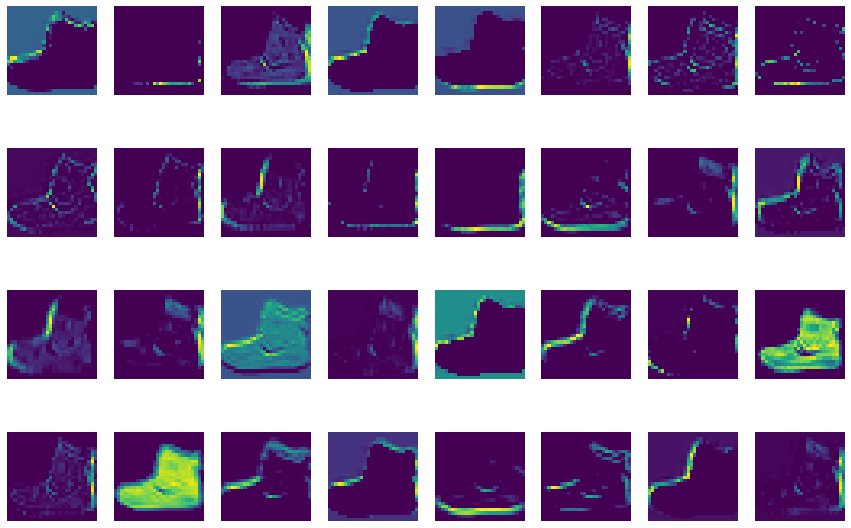

In [ ]:
fig, axs = plt.subplots(4,8,figsize=(15,10))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i,j].axis('off')
plt.show()

# 보너스 강의 - OpenCV 맛

In [4]:
import numpy as np


In [5]:
import cv2
from google.colab.patches import cv2_imshow

In [18]:
image=np.zeros((100,180,3),np.uint8)

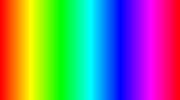

In [19]:
for i in range(0,180):
  image[:,i,0]=i
image[:,:,1]=255
image[:,:,2]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

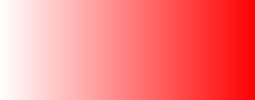

In [21]:
image=np.zeros((100,255,3),np.uint8)
image[:,:,0] = 0
for i in range(0,255):
  image[:,i,1]=i
image[:,:,2]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

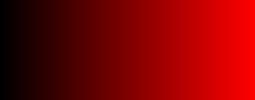

In [22]:
image=np.zeros((100,255,3),np.uint8)
image[:,:,0] = 0
for i in range(0,255):
  image[:,i,2]=i
image[:,:,1]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

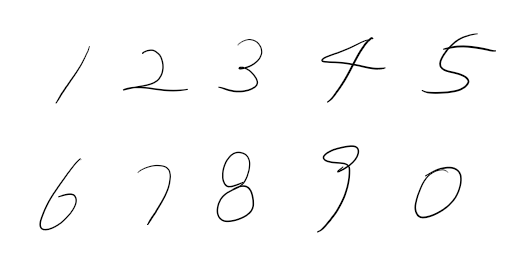

In [31]:
path = '/content/Number.png'
src_image = cv2.imread(path,cv2.IMREAD_COLOR)
cv2_imshow(src_image)

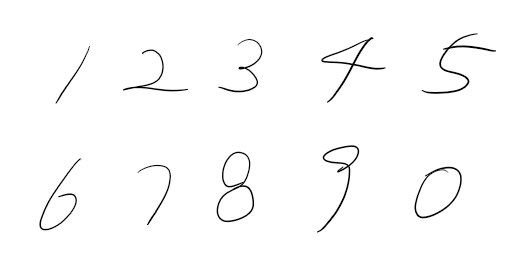

In [32]:
cpy_image = src_image.copy()
gray_image = cv2.cvtColor(src_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [33]:
src_image.shape, gray_image.shape

((259, 532, 3), (259, 532))

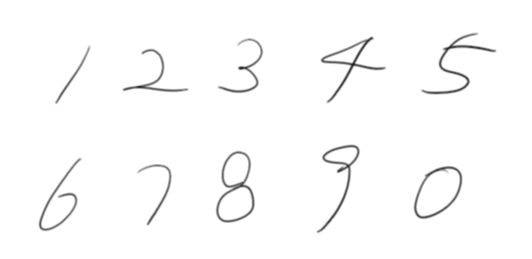

In [36]:
blur_image = cv2.GaussianBlur(gray_image,(3,3),0)
cv2_imshow(blur_image)

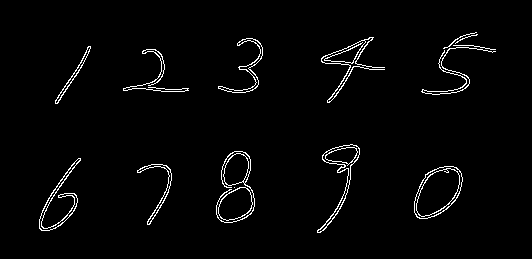

In [55]:
canny_image = cv2.Canny(blur_image,100,200)
cv2_imshow(canny_image)

In [56]:
contours,_ = cv2.findContours(canny_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
store_xywh=[]
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  flag = False
  if w>30 and h>=40:
     for sv in store_xywh:
       gx = abs(sv[0]-x)
       gy = abs(sv[1]-y)
       if gx<5 and gy<5:
         flag = True
         break
  else:
      flag = True
  if flag == False:
      store_xywh.append([x,y,w,h])
      

for sv in store_xywh:
  print(sv)

[414, 166, 49, 53]
[137, 164, 35, 61]
[39, 158, 42, 73]
[216, 151, 39, 72]
[317, 144, 43, 89]
[123, 49, 66, 43]
[421, 47, 75, 48]
[55, 46, 36, 58]
[218, 38, 45, 55]
[321, 37, 64, 66]


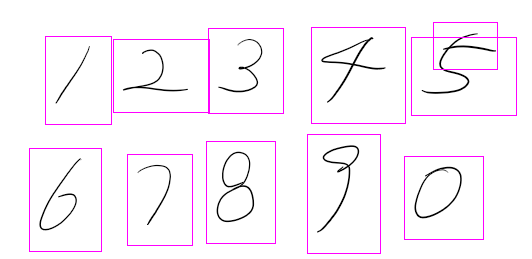

In [57]:
for sv in store_xywh:
  x,y,w,h = sv
  cv2.rectangle(src_image,(x-10,y-10),(x+w+20,y+h+20),(255,0,255),1)
cv2_imshow(src_image)

# 손글씨

In [58]:
from tensorflow import keras
(image_train, label_train),(image_test,label_test) = keras.datasets.mnist.load_data()
print(image_train.shape)

(60000, 28, 28)


In [60]:
np.unique(label_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [62]:
image_train2 = image_train.reshape(-1,28*28)
image_test2 = image_test.reshape(-1,28*28)

In [63]:
from sklearn import svm # 점들이 있고 세개의 클래스로 나누었을때 , 0과 1을 구분하는 선(벡터)를 찾는 것 : svm



In [65]:
svm = svm.SVC() # svm의 분류 모델 생성
svm.fit(image_train2,label_train)

SVC()

In [66]:
pval = svm.predict(image_test2)

In [68]:
from sklearn import metrics
score = metrics.accuracy_score(pval, label_test) # 맞춘 개수와 틀린개수중에서 몇퍼센트로 나왔는지 계산해주는 함수.
print(score)

0.9792


In [84]:
from keras.utils import np_utils
label_train2 = np_utils.to_categorical(label_train)
label_test2 = np_utils.to_categorical(label_test) # 수치형 데이터를 범주형 데이터로 변환.
print(label_train[0])
print(label_train2[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [71]:
scale_train = image_train/255.0
scaled_test = image_test/255.0


In [ ]:
from keras import layers,models
model = models.Sequential()
model.add(layers.Dense(100,activation='relu',input_shape=(784,)))
#model.add(layers.Dense(28,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
history = model.fit(image_train2,label_train2,epochs=100)

In [85]:
score = model.evaluate(image_test2,label_test2)
print(score)

313/313 [==============================] - 1s 2ms/step - loss: 1.5679 - accuracy: 0.7331
[1.5678980350494385, 0.7330999970436096]
